# Loading Data from Files with TF

In [1]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# Make sure the shape and data are OK
print(x_data.shape, "\n", x_data, "\nLength: ", len(x_data))
print(y_data.shape, "\n", y_data)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session
sess = tf.Session()
# Initialize global variables in the graph
sess.run(tf.global_variables_initializer())
# Set up feed_dict variables inside the loop
for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 100 == 0:
        print(step, "Cost: ", cost_val,
             "\nPrediction:\n", hy_val)
        
# Ask my score
print("Your score will be ", sess.run(hypothesis, 
                                      feed_dict={X: [[100, 70, 101]]}))
print("Other scores will be ", sess.run(hypothesis, 
                                       feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))

(25, 3) 
 [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] 
Length:  25
(25, 1) 
 [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]
Instructions for updating:
Colocations handled automatically by placer.
0 Cost:  21027.0 
Prediction:
 [[22.048063 ]
 [21.619772 ]
 [24.096693 ]
 [22.29302  ]
 [18.633902 ]
 [ 7.2669735]
 [12.33103  ]
 [ 3.150511 ]
 [14.347944 ]
 [ 4.2534237]
 [14.485708 ]
 [10.678068 ]
 [28.80464  ]
 [29.298803 ]
 [11.237837 ]
 [

2000 Cost:  24.722485 
Prediction:
 [[154.42894 ]
 [185.5586  ]
 [182.90646 ]
 [198.08955 ]
 [142.52043 ]
 [103.551796]
 [146.79152 ]
 [106.70152 ]
 [172.15207 ]
 [157.13037 ]
 [142.5532  ]
 [140.17581 ]
 [190.05006 ]
 [159.59953 ]
 [147.35217 ]
 [187.26833 ]
 [153.3315  ]
 [175.3862  ]
 [181.3706  ]
 [162.1332  ]
 [172.44307 ]
 [173.06042 ]
 [164.7337  ]
 [158.24257 ]
 [192.79166 ]]
Your score will be  [[181.73279]]
Other scores will be  [[145.86269]
 [187.2313 ]]


## Queue Runners

한번에 메모리에 올리기엔 너무 클 때가 있다. 그때 사용.  
  
1) Filenames  
2) Filename Queue  
3) Example Queue  

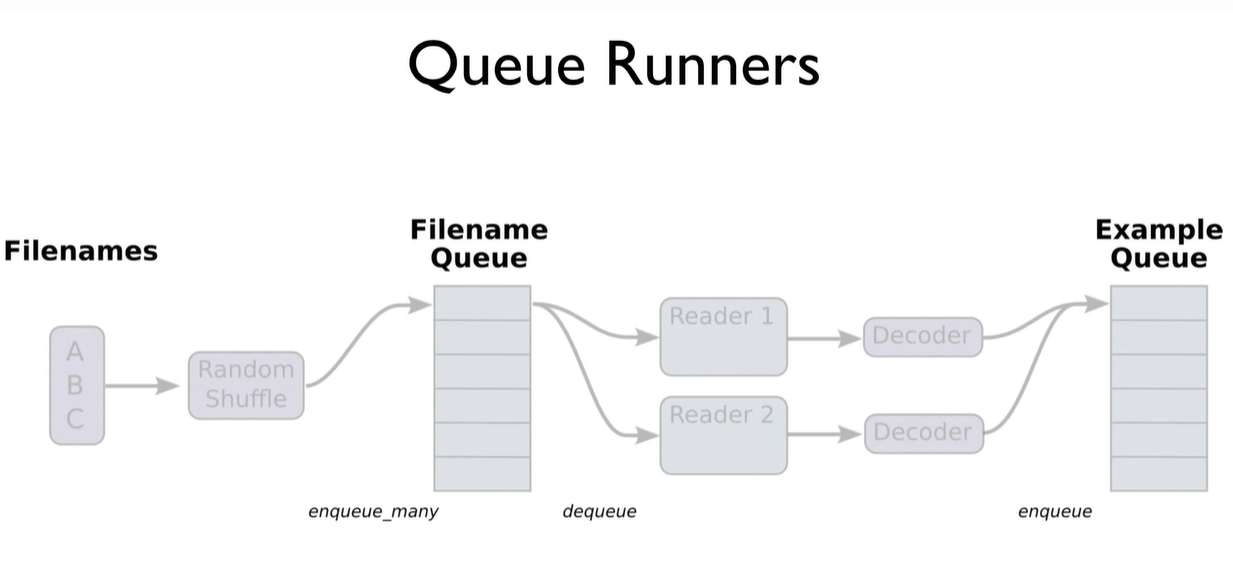

```python
#1st step:  
  filename_queue = tf.train.string_input_producer(  
    ['data-01-test-score.csv', 'data-02-test-score.csv', ...],   
    shuffle=False, name='filename_queue')

#2nd step:  
  reader = tf.TextLineReader()  
  key, value = reader.read(filename_queue)  
    
#3rd step:  
  record_defaults = [[0.], [0.], [0.],[0.]]  
  xy = tf.decode_csv(value, record_defaults=record_defaults)
```

## tf.train.batch

```python
#collect batches of csv in
train_x_batch, train_y_batch = \
    tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

sess = tf.Sesstion()
...

#Start populating the fileneame queue
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

for step in range(2001):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    ...
    
coord.request_stop()
coord.join(threads)
```

In [5]:
import tensorflow as tf
filename_queue = tf.train.string_input_producer(
    ['data-01-test-score.csv'], shuffle=False, name='filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

# Default values, in case of empty columns. Also speifies the type of the
# decoded result.
record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

# Collect batches of csv in
train_x_batch, train_y_batch = \
    tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session
sess = tf.Session()
# Initialize global variables in the graph
sess.run(tf.global_variables_initializer())

#Start populating the fileneame queue
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

for step in range(2001):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], 
        feed_dict={X: x_batch, Y: y_batch})
    if step % 100 == 0:
        print(step, "Cost: ", cost_val,
             "\nPrediction:\n", hy_val)
        
coord.request_stop()
coord.join(threads)

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
0 Cost:  63.133812 
Prediction:
 [[143.5054 ]
 [187.99063]
 [176.89337]
 [196.49518]
 [144.11916]
 [114.12243]
 [148.54465]
 [111.67695]
 [184.05104]
 [180.44626]]
100 Cost:  73.35393 
Prediction:
 [[145.91956]
 [190.30627]
 [179.48752]
 [199.1922 ]
 [145.84529]
 [115.12868]
 [150.53722]
 [113.13476]
 [185.92258]
 [181.84398]]
200 Cost:  67.941444 
Prediction:
 [[146.22487]
 [190.11105]
 [179.59492]
 [199.18695]
 [145.65746]
 [114.73584]
 [150.50922]
 [113.09701]
 [185.46034]
 [181.09534]]
300 Cost:  62.968456 
Prediction:
 [[146.51732]
 [189.92352]
 [179.69751]
 [199.1822 ]
 [145.47652]
 [114.35965]
 [150.48366]
 [113.06328]
 [185.01772]
 [180.37964]]
400 Cost:  58.398537 
Prediction:
 [[146.79749]
 [189.74338]
 [179.7955 ]
 [199.